In [1]:
import pandas as pd
import re

In [2]:
nohindi_df = pd.read_pickle("data/nohindi_recipes.pkl")
nohindi_df

,name,description,cuisine,course,diet,prep_time,ingredients,instructions
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,30.0,"4 cups Indian borage (Doddapatre) , cleaned an...","To begin making the Doddapatre Tambuli, first ..."
1,Fish Tandoori Recipe,Have you ever tried out fish tandoori? Trust m...,North Indian,Appetizer,High Protein Non Vegetarian,80.0,"1 Fish , nicely washed with bones on (I used P...","To begin making the Fish Tandoori recipe, keep..."
2,Arbi Shimla Mirch Sabzi Recipe – Colocasia Cap...,Arbi Shimla Mirch Sabzi Recipe is a variation ...,North Indian,Main Course,No Onion No Garlic (Sattvic),55.0,300 grams Colocasia root (Arbi) 1 Green Bell ...,To begin making the Arbi Shimla Mirch Sabzi Re...
3,Ambur Style Brinjal Curry Recipe,Brinjal Curry is prepared in different ways in...,Indian,Lunch,Vegetarian,20.0,5 Brinjal (Baingan / Eggplant) 1 Onion 2 Tom...,To begin making the Ambur Style Brinjal Curry ...
4,Mavinakayi Menasinakai Curry Recipe - Raw Man...,Mangalorean Mavinakayi Menasinakai Curry Recip...,Mangalorean,Side Dish,Vegetarian,35.0,"1 cup Mango (Raw) , diced 2 tablespoons Jagge...",To begin making Mangalorean Mavinakayi Menasin...
...,...,...,...,...,...,...,...,...
9491,Spinach Oats Vada Recipe,Spinach Oats Vada Recipe is a healthy twist to...,South Indian,Snack,Vegetarian,50.0,"Spinach Leaves (Palak), Chana dal (Bengal Gram...","To prepare Spinach Oats Vada Recipe, in a larg..."
9492,Kerala Style Vettu Cake Recipe (Eggless Wholew...,Vettu cake is a famous tea shop snack in Tamil...,Kerala,Snack,Vegetarian,65.0,"Whole Wheat Flour, Sugar, Cooking soda, Butter...",To prepare Kerala Style Vettu Cake Recipe (Egg...
9493,Amla/Nellikai Thogayal Recipe (Gooseberry Chut...,The Gooseberry (Amla/Nellikai) Chutney recipe ...,South Indian,Side Dish,Vegetarian,25.0,"Amla (Nellikai/ Gooseberry), Fresh coconut, Me...","To begin making the Amla Thogayal, we will fir..."
9494,Kanchakalar Khosha Bata | A Traditional Bengal...,Kanchakalar Khosha Bata is a traditional Benga...,Bengali,Side Dish,Vegetarian,30.0,"Raw Banana, Garlic, Green Chilli, Salt, Mustar...",To begin the preparation of Kanchakalar Khosha...


In [3]:
column_order = ['name', 'ingredients', 'description', 'instructions', 'cuisine', 'course', 'diet', 'prep_time']
recom_df = nohindi_df[column_order ]

In [4]:
recom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9496 entries, 0 to 9495
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          9496 non-null   object 
 1   ingredients   9496 non-null   object 
 2   description   9496 non-null   object 
 3   instructions  9496 non-null   object 
 4   cuisine       9488 non-null   object 
 5   course        9462 non-null   object 
 6   diet          9462 non-null   object 
 7   prep_time     9487 non-null   float64
dtypes: float64(1), object(7)
memory usage: 593.6+ KB


In [5]:
recom_df.describe(include="all")

,name,ingredients,description,instructions,cuisine,course,diet,prep_time
count,9496,9496,9496,9496,9488,9462,9462,9487.000000
unique,6437,9416,6426,9428,77,13,10,NaN
top,Punjabi Mooli Ki Bhurji Recipe,,Keema is a South Asian meat dish that literall...,"To begin making\xa0Hot Coffee Latte Recipe, in...",Indian,Lunch,Vegetarian,NaN
freq,3,6,4,2,1567,2490,6512,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.661010
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.484547
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000


In [6]:
recom_df["name"].value_counts()

name
Punjabi Mooli Ki Bhurji Recipe                                              3
Mangalorean Style Sonay Sukka Recipe - Dry Chickpea Stir Fry                3
Beetroot Moong Phali Sabzi Recipe-Beetroot Stir Fry with Roasted Peanuts    3
Attirachi Kuzhambu Recipe - Spicy Mutton Gravy                              3
Satsaagi Recipe - Sindhi Seven Vegetable Sabzi No Onion No Garlic           3
                                                                           ..
Vegetarian Pad Thai Recipe                                                  1
Mushroom Stroganoff Recipe                                                  1
Brown Rice & Quinoa Risotto Recipe                                          1
Moroccan Eggplant And Garbanzo Stew Recipe                                  1
Kerala Style Vettu Cake Recipe (Eggless Wholewheat Tea Shop Cake)           1
Name: count, Length: 6437, dtype: int64

In [7]:
len(recom_df["name"].unique())

6437

In [8]:
recom_df["name"].sort_values()

7528                   Achari Chicken Masala Pasta Recipe
5068                           Baked Polenta Fries Recipe
5034     Beet Apple Salad Recipe with Apple Cider Vina...
1273           Grated Carrot Cucumber Tomato Raita Recipe
6495           Grated Carrot Cucumber Tomato Raita Recipe
                              ...                        
5211                     Zucchini and Carrot Pasta Recipe
4001      Zucchini, Corn And Smoked Cheese Muffins Recipe
2689                     Zunka Recipes (Spicy Gram Flour)
5764    Æbleskivers Recipe- Danish Chocolate Pancake P...
7324                  ​​​​​​​Caramel Bread Pudding Recipe
Name: name, Length: 9496, dtype: object

In [9]:
recom_df["cuisine"] = recom_df['cuisine'].str.replace('Gujarati \ufeff', 'Gujarati')
recom_df["cuisine"] = recom_df['cuisine'].str.replace('Gujarati \\ufeff', 'Gujarati')

recom_df["cuisine"].unique()

array(['Indian', 'North Indian', 'Mangalorean', 'Kerala', 'Konkan',
       'South Indian', 'Tamil Nadu', 'Bengali', 'Andhra', 'Coorg',
       'Hyderabadi', 'Kashmiri', 'Punjabi', 'Gujarati',
       'Coastal Karnataka', 'Karnataka', 'Goan', 'Sichuan', 'Udupi',
       'Chettinad', 'Maharashtrian', 'Mughlai', 'Malvani',
       'North East India', 'Rajasthani', 'Parsi', 'Bihari', 'Awadhi',
       'North Karnataka', 'Assamese', 'Pakistani', 'Himachal',
       'Middle Eastern', 'Oriya', 'Uttarakhand-North Kumaon', 'Lucknowi',
       'Sindhi', 'Indo Chinese', 'Uttar Pradesh', 'Kongunadu', 'Chinese',
       'Haryana', 'South Karnataka', 'Fusion', nan, 'Malabar', 'Nepalese',
       'Continental', 'Jharkhand', 'Sri Lankan', 'Thai', 'Arab',
       'Nagaland', 'Afghan', 'Asian', 'African', 'Korean', 'European',
       'Mexican', 'Japanese', 'Italian', 'Mediterranean', '', 'Jewish',
       'Vietnamese', 'French', 'Cantonese', 'Caribbean', 'Indonesian',
       'American', 'Malaysian', 'Greek', 'Burm

In [10]:
recom_df["cuisine"].value_counts()

cuisine
Indian          1567
North Indian    1364
Continental     1097
South Indian    1032
Bengali          290
                ... 
Burmese            2
Jewish             1
Hunan              1
Bangladeshi        1
Singapore          1
Name: count, Length: 76, dtype: int64

In [11]:
recom_df["course"].value_counts()

course
Lunch                     2490
Side Dish                 1481
Dessert                   1048
Dinner                    1007
Snack                      981
Appetizer                  755
South Indian Breakfast     493
Main Course                486
World Breakfast            296
North Indian Breakfast     220
Indian Breakfast           155
One Pot Dish                42
Brunch                       8
Name: count, dtype: int64

In [12]:
recom_df["diet"].value_counts()

diet
Vegetarian                      6512
High Protein Vegetarian          907
Non Vegeterian                   628
Diabetic Friendly                425
Eggetarian                       386
High Protein Non Vegetarian      341
No Onion No Garlic (Sattvic)     100
Gluten Free                       85
Vegan                             63
Sugar Free Diet                   15
Name: count, dtype: int64

In [13]:
recom_df["prep_time"].value_counts()

prep_time
40.0     1380
30.0     1174
50.0      912
35.0      777
45.0      760
         ... 
335.0       1
455.0       1
450.0       1
610.0       1
53.0        1
Name: count, Length: 167, dtype: int64

In [14]:
len(recom_df["prep_time"].value_counts())

167

In [15]:
def categorize_preparation_time(time):
    if time <= 15:
        return '~15 min'
    elif time <= 30:
        return '~30 min'
    elif time <= 45:
        return '~45 min'
    elif time <= 60:
        return '~1 hour'
    elif time <= 75:
        return '~1 hour 15 min'
    elif time <= 90:
        return '~1 hour 30 min'
    elif time <= 105:
        return '~1 hour 45 min'
    elif time <= 120:
        return '~2 hours'
    else:
        # For times beyond 120 minutes, categorize in 30-minute intervals, in hours
        hours = time // 60
        if time % 60 <= 15:
            return f'~{hours} hours'
        elif time % 60 <= 45:
            return f'~{hours} hours 30 min'
        else:
            return f'~{hours + 1} hours'

recom_df['categorized_prep_time'] = recom_df['prep_time'].apply(categorize_preparation_time)
recom_df['categorized_prep_time']

0              ~30 min
1       ~1 hour 30 min
2              ~1 hour
3              ~30 min
4              ~45 min
             ...      
9491           ~1 hour
9492    ~1 hour 15 min
9493           ~30 min
9494           ~30 min
9495           ~15 min
Name: categorized_prep_time, Length: 9496, dtype: object

In [16]:
recom_df['categorized_prep_time'].value_counts().sort_values(ascending=False)

categorized_prep_time
~45 min               2930
~30 min               2310
~1 hour               2066
~1 hour 15 min         666
~15 min                498
~1 hour 30 min         279
~1 hour 45 min         135
~2.0 hours 30 min      111
~3.0 hours              68
~2 hours                66
~2.0 hours              39
~3.0 hours 30 min       38
~6.0 hours 30 min       33
~4.0 hours 30 min       33
~9.0 hours              32
~8.0 hours 30 min       30
~7.0 hours              23
~4.0 hours              22
~5.0 hours 30 min       18
~5.0 hours              16
~8.0 hours              12
~9.0 hours 30 min       12
~6.0 hours              11
~7.0 hours 30 min       11
~10.0 hours 30 min       9
~nan hours               9
~12.0 hours              3
~14.0 hours              2
~10.0 hours              2
~48.0 hours 30 min       2
~12.0 hours 30 min       2
~16.0 hours              2
~47.0 hours              1
~24.0 hours              1
~15.0 hours 30 min       1
~13.0 hours 30 min       1
~13.0 

In [17]:
len(recom_df['categorized_prep_time'].unique())

38

Plot the distribution of four "course", "diet", "cuisine" and "categorized_prep_time" columns

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_categories(df, column, top_n=20):
   
    # Count the occurrences and sort in descending order
    sorted_counts = df[column].value_counts().sort_values(ascending=False)
    
    # Limit to top N categories if there are more than top_n
    categories_to_plot = sorted_counts.index[:top_n]
    
    plt.figure(figsize=(15, 5))
    sns.countplot(x=df[column], order=categories_to_plot, palette='Set2')
    
    plt.title(f'{column.capitalize()} Distribution')
    plt.ylabel('Count')
    plt.xlabel(column.capitalize())
    plt.xticks(rotation=45)
    plt.show()

C:\Users\rogha\AppData\Local\Temp\ipykernel_62072\3448900486.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], order=categories_to_plot, palette='Set2')


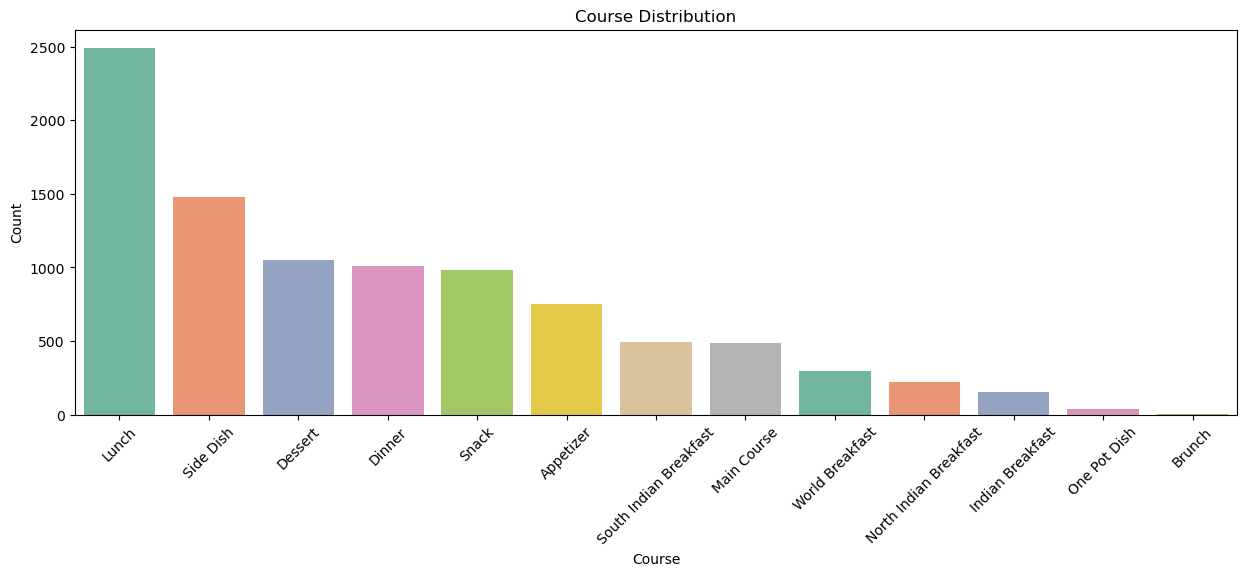

In [19]:
plot_top_categories(recom_df, 'course')

C:\Users\rogha\AppData\Local\Temp\ipykernel_62072\3448900486.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], order=categories_to_plot, palette='Set2')


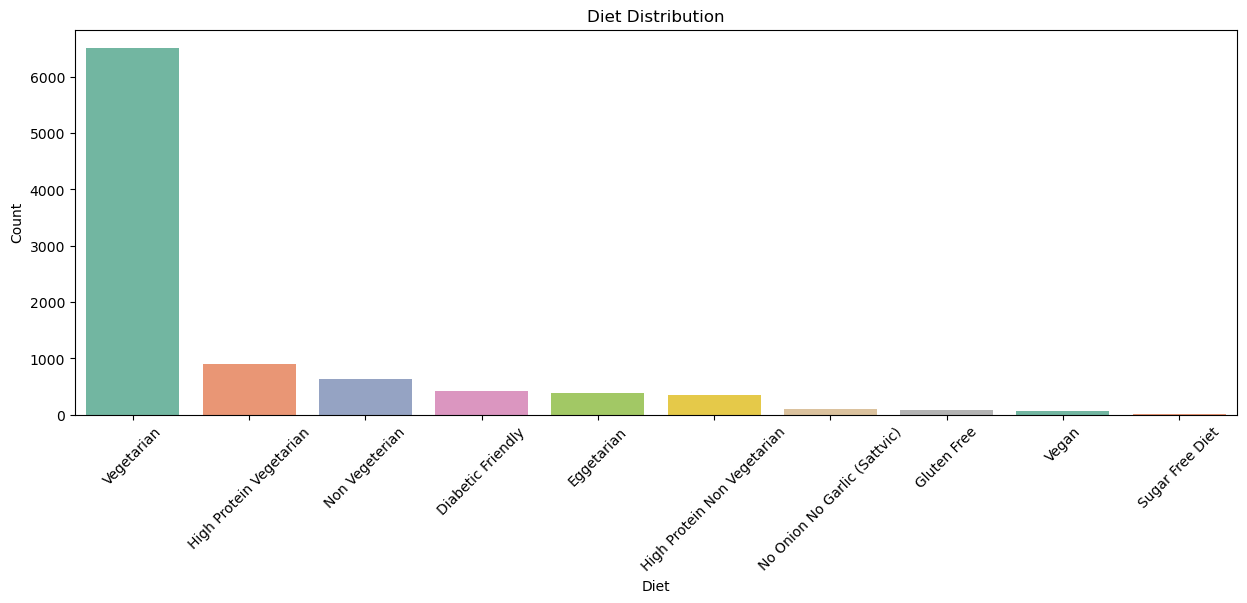

In [20]:
plot_top_categories(recom_df, 'diet')

C:\Users\rogha\AppData\Local\Temp\ipykernel_62072\3448900486.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], order=categories_to_plot, palette='Set2')


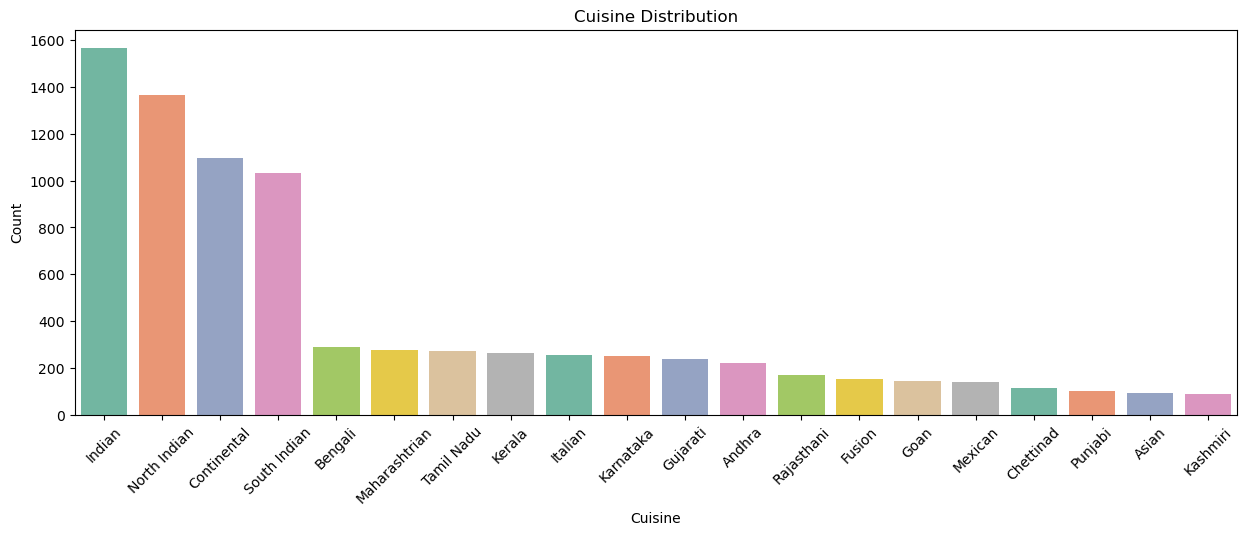

In [21]:
plot_top_categories(recom_df, 'cuisine')

C:\Users\rogha\AppData\Local\Temp\ipykernel_62072\3448900486.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], order=categories_to_plot, palette='Set2')


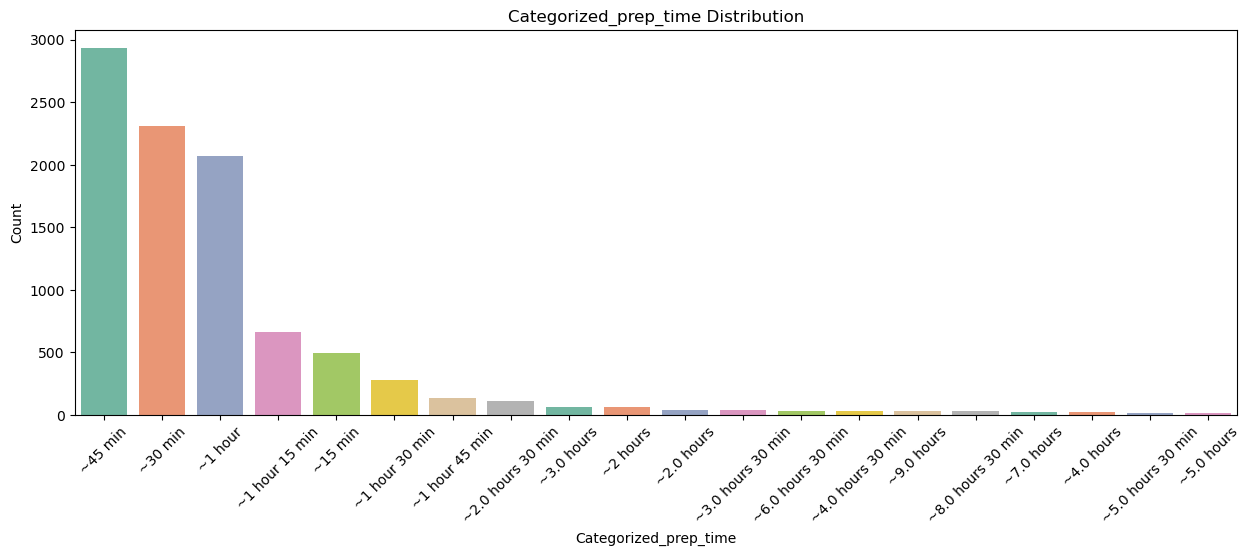

In [22]:
plot_top_categories(recom_df, 'categorized_prep_time')

Clean the "ingredients" column and find the most frequent ingredients

In [23]:
import spacy
import re
import nltk
from nltk.corpus import stopwords

unwanted_words = ['cleaned','and','washed','as','needed','thinly','sliced','Thin','add','adjustable','adjust','just','unripe', 'unskimmed', 
                  'more', 'more if','rings', 'I', 'have','used', 'I like adding','mashed','you', 'can',"minced",'preferably','per','about',
                  'warm','very', 'vertically','well','long','tsp','tbsp', 'uncooked','unpeeled','your','th','the','of','powdered',
                  'could', 'also', 'use','give', 'it','is', 'prefered','if','bunch','a','small', 'piece','pieces', 'pinch',"medium sized",
                  'additional','assorted','approximately','optional','broken','bowl','finely','chopped','small','cut','roasted',
                  'thick','cubes','julienned','deseeded', "de-veined",'slices', "only", "need",'taste', 'required','boiled',"big", "large",
                  'coarsely','pounded','grated','blanched','a','few','pureed','made','cubed','steamed','quartered','into','preferable',
                  'peeled','slivered','or','whisked','nicely','on','diced',' but recommended','according','overnight',"peel",
                  'soaked','in','roughly','Wet','Ingredients','Everest brand', 'Enough','any','other','s ', 'teaspoon', "one","two",
                  'tablespoons','tablespoon']
    
# Download stopwords list
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))
stop_words.add("ingredient")

# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")

# Function to clean and retain only nouns (ingredients)
def clean_ingredients(ingredient_text):
    cleaned_text = re.sub(r'^"|"', '', ingredient_text.strip())
    icleaned_text =  re.sub(r'Archanas\s*Kitchen|Archana\\\\s Kitchen', '',cleaned_text)
    cleaned_text = re.sub(r'Archana\\s Kitchen', '',cleaned_text)
    # Remove quantities and units
    cleaned_text = re.sub(r'\d+(?:-\d+)?(?:/\d+)?\s*(?:cup|cups?|tablespoon|tablespoons?|teaspoon|teaspoons?|gms?|gram|grams?|kg|ml|inch|pound|pounds?|liters?)?\s*', ',', cleaned_text, flags=re.IGNORECASE)
    ##find a number followed by unit
    cleaned_text = re.sub(r'\d+\s+\b\w+\b', ',', cleaned_text, flags=re.IGNORECASE)
    # Add a comma before the words "to" or "for" (case-insensitive)
    cleaned_text = re.sub(r'\b(to|for|with|without|salt)\b', r', \1', cleaned_text, flags=re.IGNORECASE)
    
    # Remove unwanted words/phrases from the ingredient text
    for word in unwanted_words:
       cleaned_text = re.sub(r'\b' + re.escape(word) + r'\b', '', cleaned_text, flags=re.IGNORECASE)
    
    cleaned_text = re.sub(r'\s*,\s*', ',', cleaned_text)  # clean up commas
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()  # clean extra spaces
    cleaned_text = re.sub(r',+', ',', cleaned_text)  # remove consecutive commas
    cleaned_text = cleaned_text.strip(',')  # remove leading/trailing commas
    cleaned_text = re.sub(r'[/\.\-:*)(&"%/+]', '', cleaned_text)# Remove //, ./, -, /, :, *, +    
    cleaned_text = re.sub(r'\(\s*\)', '', cleaned_text)# Remove empty parentheses or parentheses with spaces 
    
     # Split the cleaned text into individual ingredients 
    ingredient_list = [ingredient.strip().lower() for ingredient in cleaned_text.split(',') if ingredient.strip() 
                       and not ingredient.strip().lower().startswith('for') 
                       and not ingredient.strip().lower().startswith('to') 
                       and not ingredient.strip().lower().startswith('with')
                      and not ingredient.strip().lower().startswith('without')
                      and not ingredient.strip().lower().startswith('no')]
    
    processed_ingredients = []
    for ingredient in ingredient_list:
        # Create a spaCy document object for each ingredient
        doc = nlp(ingredient)
        # Keep only noun phrases or single nouns as ingredients
        processed_tokens = [token.lemma_ for token in doc if token.pos_ not in {"VERB", "ADV"} and token.is_alpha and token.text.lower() not in stop_words]
        if processed_tokens:  # if it is not empty
            processed_ingredients.append(" ".join(processed_tokens))  # Join multi-word ingredients like 'cumin powder'filtered_ingredients.extend(filtered_tokens)  
    return  processed_ingredients

recom_df['cleaned_ingredients'] = recom_df['ingredients'].apply(clean_ingredients)
recom_df['cleaned_ingredients']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rogha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [indian borage doddapatre, curd dahi yogurt, c...
1       [fish, curd dahi yogurt, onion, green chilli, ...
2       [colocasia root arbi, green bell pepper capsic...
3       [brinjal baingan eggplant, onion, ginger garli...
4       [mango, jaggery, turmeric powder, tamarind wat...
                              ...                        
9491    [spinach palak, chana dal bengal gram dal, ins...
9492    [whole wheat flour, sugar, soda, butter, salt,...
9493    [amla nellikai gooseberry, fresh coconut, meth...
9494    [raw banana, garlic, green chilli, salt, musta...
9495    [onion, green chilli, mint pudina, fresh cocon...
Name: cleaned_ingredients, Length: 9496, dtype: object

In [24]:
recom_df["cleaned_ingredients"].value_counts()

cleaned_ingredients
[]                                                                                                                                                                                                                                                                                                                                                     6
[lemon, sugar, salt, red chilli powder]                                                                                                                                                                                                                                                                                                                5
[brinjal baingan eggplant, potato, kalonji onion nigella seed, cumin jeera, homemade tomato puree, turmeric powder, red chilli powder, coriander powder dhania, garam masala powder, sugar, coriander dhania, oil, salt, oil, salt]                                                               

In [25]:
# Create a unique ingredient set by flattening the list and removing duplicates
unique_ingredient_list = set(ingredient for sublist in recom_df["cleaned_ingredients"] for ingredient in sublist if ingredient)

#Convert the set to a list
unique_ingredient_list = sorted(unique_ingredient_list)
unique_ingredient_list

['aa oil',
 'aachi fish masala',
 'aam papad sun mango',
 'aamra',
 'aar maach fish',
 'achari masala',
 'achari masala oil',
 'achari mayo',
 'active dry yeast',
 'ada',
 'adobo sauce',
 'agar agar',
 'agathi keerai',
 'ajwain carom seed',
 'ajwain carom seeds black sesame seed',
 'ajwain carom seeds curry leave',
 'ajwain carom seeds water',
 'ajwain powder',
 'akhrot',
 'al dente',
 'alfalfa powder',
 'alfalfa sprout',
 'allpurpose flour',
 'almanellikai',
 'almond',
 'almond almond butter',
 'almond butter',
 'almond cashewnut',
 'almond essence badam essence',
 'almond meal badam powder',
 'almond milk',
 'almond milk badam milk',
 'almond nuts pistachio',
 'almond oil badam oil',
 'almondscashew',
 'aloe vera extract',
 'along',
 'aloo bhujia',
 'aloo tikki potato',
 'alu',
 'amaranth',
 'amaranth seeds rajgira',
 'amchur dry mango powder',
 'amchur dry mango powder coriander dhania',
 'amchur dry mango powder mint pudina',
 'amchur dry mango powder oil',
 'amla nellikai gooseber

In [26]:
len(unique_ingredient_list)

2600

In [27]:
from collections import Counter

#Flatten the list of ingredients from all rows
all_ingredients = [ingredient for sublist in recom_df['cleaned_ingredients'] for ingredient in sublist]

#Count the frequency of each ingredient
ingredient_counts = Counter (all_ingredients)

#Find the most frequent ingredients
most_frequent_ingredients = ingredient_counts.most_common(10) 

print(f"Most frequent ingredients: {most_frequent_ingredients[0][0]}, Count: {most_frequent_ingredients[0][1]}")

sorted_clean_ingredients = ingredient_counts.most_common()  
print(sorted_clean_ingredients)

Most frequent ingredients: salt, Count: 8406
[('salt', 8406), ('oil', 3934), ('turmeric powder', 3782), ('onion', 3728), ('green chilli', 3482), ('garlic', 3125), ('red chilli powder', 2880), ('ginger', 2613), ('cumin jeera', 2590), ('mustard rai kadugu', 2230), ('coriander dhania', 2134), ('ghee', 1833), ('water', 1781), ('dry red chilli', 1719), ('sugar', 1687), ('asafoetida hing', 1501), ('milk', 1478), ('garam masala powder', 1401), ('coriander powder dhania', 1394), ('fresh coconut', 1380), ('curry', 1367), ('cumin powder jeera', 1140), ('lemon juice', 1104), ('curd dahi yogurt', 1102), ('cinnamon stick dalchini', 1056), ('black pepper powder', 1015), ('extra virgin olive oil', 953), ('laung', 903), ('butter', 887), ('carrot gajjar', 885), ('cardamom elaichi podsseed', 880), ('jaggery', 868), ('whole black peppercorn', 844), ('nut', 775), ('whole wheat flour', 762), ('white urad dal split', 751), ('sprig curry', 735), ('cardamom powder elaichi', 628), ('purpose flour maida', 622),

C:\Users\rogha\AppData\Local\Temp\ipykernel_62072\3812836911.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts[:20], y=ingredients[:20], palette='Set1')


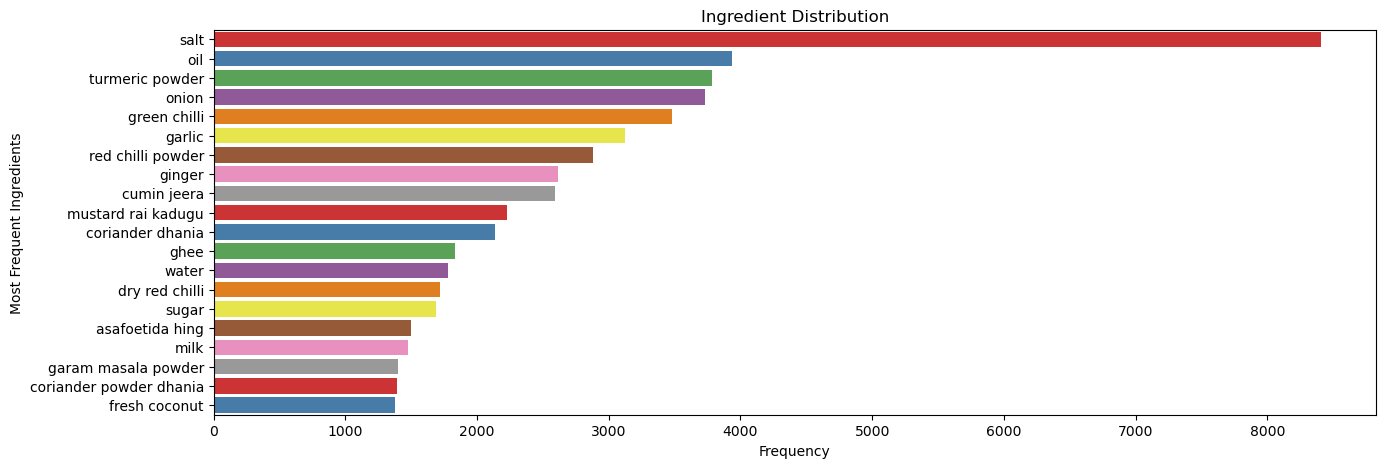

In [28]:
# Separate the ingredient names and their counts for plotting
ingredients, counts = zip(*sorted_clean_ingredients)

plt.figure(figsize=(15, 5)) 
sns.barplot(x=counts[:20], y=ingredients[:20], palette='Set1')  
plt.title('Ingredient Distribution')  
plt.xlabel('Frequency') 
plt.ylabel('Most Frequent Ingredients')  
plt.show()  

Add two columns of "allergens" and "allergen_type" to our data using the exsiting information

In [29]:

allergen_list = ['milk', 'cheese', 'feta', 'paneer','yogurt', 'butter', 'cream', 'egg', 'tree nut', 'walnut', 'Pistachio', 'hazelnut','almond', 'pecan', 'cashew','peanut', 
                 'wheat','grain','cereal', 'triticale', 'barley', 'oats', 'rye','bread', 'naan', 'pasta', 'spaghetti', 'macaroni', 'lasagna', 'soy', 'soybean', 'soya','lupin', 'mustard', 'sesame', 
                 'fish','salmon', 'tuna', 'cod', 'crustacea','mollusc', 'clam', 'mussel', 'oyster','squid', 'shellfish', 'crab', 'lobster', 'shrimp']

# Function to find allergens in each row of ingredients
def find_allergens(ingredient_list):
    allergens_found = [ingredient for ingredient in ingredient_list if ingredient in allergen_list]
    return allergens_found if allergens_found else None  # Return None if no allergens are found

# Apply the function to the 'cleaned_ingredients' column 
recom_df['allergens'] = recom_df['cleaned_ingredients'].apply(find_allergens)

recom_df['allergens']

0                 None
1               [fish]
2                 None
3                 None
4                 None
             ...      
9491              None
9492    [butter, milk]
9493              None
9494              None
9495              None
Name: allergens, Length: 9496, dtype: object

In [30]:
recom_df['allergens'].value_counts()

allergens
[milk]                            936
[butter]                          445
[butter, milk]                    103
[milk, milk]                      101
[walnut]                           78
                                 ... 
[walnut, pecan, butter]             1
[butter, butter, milk, butter]      1
[milk, butter, milk, cheese]        1
[butter, walnut, walnut]            1
[hazelnut]                          1
Name: count, Length: 101, dtype: int64

In [ ]:
import spacy
from nltk.corpus import stopwords

unwanted_words = ['day', 'bit', 'ring', 'tsp','tbsp', 'bunch', 'piece', 'pinch',"medium",  "size", 'bowl','cube','slice', 'Wet','ingredient','Everest', 'brand', 'teaspoon', "one","two",
                   'tablespoon', "gram", "cup", "pan", "recipe", "heat", "minute",'gms', 'kg', 'ml', 'inch', 'pound' , 'liter', 'second', 'cooker', 'hand', 'lunch', 'dinner', 
                   'breakfast', 'couple', 'stir', 'extra', 'time', 'top', 'way', 'taste', 'food', 'restaurant', 'month']

# Load the English model in spaCy
nlp = spacy.load("en_core_web_sm")

# Load stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(unwanted_words)

# Function to preprocess the text (lemmatization and removing stopwords) and return only nouns. 
def preprocess_text(text):
    doc = nlp(text)  # Process the text with spaCy NLP model
    
    lemmatized_words = [token.lemma_ for token in doc if token.pos_ not in {"VERB", "ADV"} and token.is_alpha and token.text.lower() not in stop_words]
    return ' '.join(lemmatized_words)  # Return preprocessed text as a string


# Apply preprocessing to the 'name', 'instruction' and 'description' columns
recom_df['processed_name'] = recom_df['name'].apply(preprocess_text)
recom_df['processed_instructions'] = recom_df['instructions'].apply(preprocess_text)
recom_df['processed_description'] = recom_df['description'].apply(preprocess_text)

KeyboardInterrupt: 

In [56]:
recom_df['name'][0]

'Doddapatre Tambuli Recipe (Karpooravalli Thayir Pachadi)'

In [57]:
recom_df['processed_name'][0]

''

In [32]:
recom_df['instructions'][0]

'To begin making the Doddapatre Tambuli, first thoroughly wash the doddapatre leaves and wipe them dry between kitchen towels.Then place a kadai on the heat. Heat a tablespoon of ghee in it, and add the doddapatre leaves to the ghee. Sauce them gently on a medium heat until they change colour and sweat. continue to saute until all the water they release has evaporated. The leaves will change colour and reduce to half the quantity.Take them out of the kadai and transfer them into a mixer and set the jar aside.In the same kadai, dry roast jeera and black pepper corns till the jeera turns dark in colour and aromatic. Add these roasted spices also into the mixer jar.Add coconut, salt to the mixer too and grind it using half the quantity of yogurt, until it is a smooth paste.Transfer the paste into a serving bowl. Top it up with the remaining yogurt and whisk until it is smoothly combined.Place a tadka ladle on the heat and melt some ghee in it. When the ghee is warm, add the cumin seeds, a

In [33]:
recom_df['processed_instructions'][0]

'doddapatre leave kitchen towel kadai ghee doddapatre ghee colour sweat water leave colour quantity mixer jar roast jeera pepper corn jeera colour spice mixer jar coconut salt mixer quantity yogurt paste paste yogurt whisk tadka ladle ghee ghee cumin seed tempering tambuli child'

In [34]:
# Function to search for allergens in processed name, instructions, and description columns
def find_allergens(row, allergen_list):
    allergens_found = set()
    
    # Combine processed text columns to search within them
    combined_text = ' '.join([row['processed_name'], row['processed_instructions'], row['processed_description']])
    
    # Search for allergens in the combined text
    for allergen in allergen_list:
        if allergen in combined_text:
            allergens_found.add(allergen)
    
    # If allergens are found, update the allergen column as a list
    if allergens_found:
        # Check if there are existing allergens in the row 
        existing_allergens = row['allergens']
        if existing_allergens is None:
            existing_allergens = []  

        # Combine new allergens with existing ones, ensuring uniqueness
        updated_allergens = list(set(existing_allergens) | allergens_found)
        return updated_allergens  # Return updated allergen list
    
    # If no new allergens are found, return the existing allergen list
    return row['allergens']

recom_df['allergens'] = recom_df.apply(lambda row: find_allergens(row, allergen_list), axis=1)
recom_df['allergens']

0                         [yogurt]
1                           [fish]
2                         [peanut]
3                [peanut, mustard]
4                             None
                   ...            
9491                          None
9492    [wheat, butter, egg, milk]
9493                          None
9494                     [mustard]
9495                     [mustard]
Name: allergens, Length: 9496, dtype: object

In [35]:
recom_df['allergens'].value_counts()

allergens
[mustard]                                 1540
[milk]                                     320
[wheat]                                    189
[egg]                                      164
[bread]                                    154
                                          ... 
[yogurt, butter, cheese, grain, cream]       1
[grain, wheat, butter, milk]                 1
[butter, walnut, egg, cream]                 1
[grain, butter, cheese]                      1
[butter, peanut, walnut, milk]               1
Name: count, Length: 966, dtype: int64

In [36]:
#count none allergen rows 
recom_df['allergens'].isna().sum()

2216

In [37]:
recom_df['allergens'].fillna("unknown", inplace=True)

In [38]:
allergen_categories = {
    "Dairy": ["milk", "paneer", "feta","cheese", "yogurt", "butter", "cream"],
    "Eggs": ["egg"],
    "Fish and Shellfish": ["fish", "shellfish", 'crustacea','mollusc', "salmon", "tuna", "cod", "shrimp", "crab", "lobster", "mussel", "oyster", "squid"],
    "Tree Nuts and Peanuts": ['tree nut', "almond", "cashew", "walnut", "peanut", "pistachio", 'pecan', 'hazelnut'],
    "Legumes and Seeds": ["peanut", "soybean",' soy', 'soya', "sesame", "mustard"],
    "Grains and Gluten": ["grain", 'triticale', "wheat", "barley", "rye", "oats", "cereal", 'bread', 'naan', 'pasta', 'spaghetti', 'macaroni', 'lasagna']
}
def categorize_allergens(allergens):
    allergen_types = []
    for allergen in allergens:
        for category, items in allergen_categories.items():
            if allergen in items and category not in allergen_types:
                allergen_types.append(category)
    return allergen_types if allergen_types else None

# Apply the function to create the "allergen type" column
recom_df["allergen_type"] = recom_df["allergens"].apply(categorize_allergens)
recom_df["allergen_type"]

0                                          [Dairy]
1                             [Fish and Shellfish]
2       [Tree Nuts and Peanuts, Legumes and Seeds]
3       [Tree Nuts and Peanuts, Legumes and Seeds]
4                                             None
                           ...                    
9491                                          None
9492              [Grains and Gluten, Dairy, Eggs]
9493                                          None
9494                           [Legumes and Seeds]
9495                           [Legumes and Seeds]
Name: allergen_type, Length: 9496, dtype: object

In [39]:
recom_df['allergen_type'].fillna("Unknown", inplace=True)

In [40]:
recom_df["allergen_type"].value_counts()

allergen_type
Unknown                                                                 2276
[Legumes and Seeds]                                                     1600
[Dairy]                                                                 1368
[Grains and Gluten]                                                      596
[Tree Nuts and Peanuts, Legumes and Seeds]                               346
                                                                        ... 
[Grains and Gluten, Legumes and Seeds, Tree Nuts and Peanuts]              1
[Eggs, Tree Nuts and Peanuts, Fish and Shellfish, Legumes and Seeds]       1
[Tree Nuts and Peanuts, Fish and Shellfish, Dairy]                         1
[Grains and Gluten, Fish and Shellfish, Tree Nuts and Peanuts]             1
[Eggs, Legumes and Seeds, Dairy]                                           1
Name: count, Length: 126, dtype: int64

In [41]:
gluten_free_df = recom_df[recom_df['diet']=="Gluten Free"]
gluten_free_df

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description,allergen_type
19,Cabbage & Buttermilk Curry Recipe,"1 Cabbage (Patta Gobi/ Muttaikose) , medium si...",Cabbage & Buttermilk Curry Recipe is one of my...,"To prepare Cabbage & Buttermilk Curry Recipe, ...",Indian,Lunch,Gluten Free,35.0,~45 min,"[cabbage patta gobi muttaikose, green chilli, ...","[butter, milk, mustard]",,ingredient oil flame mustard seed mustard salt...,mother creation kadi curry buttermilk cabbage ...,"[Dairy, Legumes and Seeds]"
177,Besan Arbi Roast Recipe - Spicy Colocasia Stir...,250 grams Colocasia root (Arbi) 2 tablespoon ...,Arbi is Colocasia or Taro Root. It’s a root ve...,"To begin making the Besan Arbi Roast Recipe, s...",Indian,World Breakfast,Gluten Free,50.0,~1 hour,"[colocasia root arbi, gram flour besan, red ch...",unknown,,arbi mud dirt pressure arbi water salt whistle...,Arbi root vegetable antioxidant fiber mineral ...,Unknown
203,Mixed Vegetable Akki Roti Recipe,"300 grams Rice flour 1 Carrot (Gajjar) , grat...",Mixed Vegetable Akki Roti is a famous recipe f...,"To prepare Mixed Vegetable Akki Roti Recipe, g...",North Karnataka,South Indian Breakfast,Gluten Free,85.0,~1 hour 30 min,"[rice flour, carrot gajjar, cucumber, green be...","[butter, bread]",,grate vegetable flour oil vegetable cumin seed...,article mix vegetable green akki roti dish adv...,"[Dairy, Grains and Gluten]"
281,Masala Akki Roti With Spinach Recipe - sarvapi...,3 cups Rice flour 2 cups Water 1 cup Spring ...,Sarvapindi also known as Akki roti in some are...,To begin preparing the Masala Akki Roti with S...,Andhra,South Indian Breakfast,Gluten Free,100.0,~1 hour 45 min,"[rice flour, water, spring onion green, spinac...",unknown,sarvapindi,pot cup water boil rice flour batter minute ro...,roti area dish state snack dish variety paste ...,Unknown
348,Mini Bajra Uttapam Recipe,For the Bajra uttapam 1/2 cup Bajra (seeds) 1...,Mini Bajra Uttapam Recipe is essentially a mil...,"To begin making the Mini Bajra Uttapam Recipe,...",South Indian,South Indian Breakfast,Gluten Free,520.0,~8.0 hours 30 min,"[bajra seed, idli rice, white urad dal whole, ...",unknown,,batter urad dal methi water idli rice seed wat...,millet batter pearl millet urad dal rice,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,Instant Puliyodharai Powder Recipe (Puliyogare...,"Tamarind, Jaggery, Asafoetida (hing), Salt, Ch...",Puliyodharai/Puliyogare/Pulihora is a traditio...,"""To begin making Instant Puliyodharai/ Puliyog...",South Indian,Appetizer,Gluten Free,55.0,~1 hour,"[tamarind, jaggery, asafoetida hing, salt, cha...","[peanut, mustard]",,kadai roast ingredient dal aroma chili oil min...,rice dish dish place menu festival custom rice...,"[Tree Nuts and Peanuts, Legumes and Seeds]"
9273,Homemade Herb Butter Recipe,"Butter (Salted), Parsley leaves, Basil leaves,...",Having a Homemade Herb Butter ready in your re...,To begin making the\xa0Homemade Herb Butter Re...,Continental,Side Dish,Gluten Free,30.0,~30 min,"[butter, parsley, basil leave, lemon zest]","[pasta, butter, bread]",,processor herbed butter container refrigerator...,refrigerator bread pasta vegetable punch veget...,"[Grains and Gluten, Dairy]"
9274,Kolhapuri Masala Recipe (Maharashtrian Masala ...,"Coriander (Dhania) Seeds, Cumin seeds (Jeera),...",Kolhapuri Masala Recipe is a spicy Maharashtri...,To begin making the\xa0Kolhapuri Masala Recipe...,Maharashtrian,Side Dish,Gluten Free,30.0,~30 min,"[coriander dhania seed, cumin jeera, coconut, ...",unknown,,ingredient ingredient list smell spice tablesp...,masala touch cuisine faint lot dish trademark ...,Unknown
9280,Overnight Oats Recipe (No Cook Blueberry Vanil...,"Rolled Oats, Milk, Blueberries, Chia Seeds, Ho...",The Overnight Oats Recipe is a simple and quic...,To begin making the Overnight Oats Recipe (No ...,Continental,World Br

In [42]:
gluten_df = recom_df[recom_df["allergen_type"].apply(lambda x: "Grains and Gluten" in x)]
gluten_df

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description,allergen_type
12,Mixed Vegetable Pulao Recipe,1 cup Brown Rice 2 tablespoons Ghee 2 cloves...,The Mixed Vegetable Pulao Recipe is a simple a...,To begin making the Mixed Vegetable Pulao Reci...,Indian,Dinner,Vegetarian,60.0,~1 hour,"[brown rice, ghee, garlic, green chilli, slit,...",[grain],,rice cup water hour rice vegetable salt powder...,dish weeknight pulao lot vegetable nutrition m...,[Grains and Gluten]
28,Whole Wheat Lachha Paratha Recipe-Multilayered...,2 cups Whole Wheat Flour 1 teaspoon Salt Ghee...,The Whole Wheat Lachha Paratha Recipe is a cla...,To begin making the Whole Wheat Lachha Paratha...,Indian,Dinner,Diabetic Friendly,70.0,~1 hour 15 min,"[whole wheat flour, salt ghee]","[wheat, bread]",,dough mixing wheat flour salt oil flour crumb ...,bread maida purpose flour wheat chakki atta re...,[Grains and Gluten]
30,Baked Amritsari Kulcha Recipe (Without Yeast),1-1/2 cup All Purpose Flour (Maida) 1 teaspoo...,Kulcha is a type of mildly leavened flatbread ...,To begin making the Baked Amritsari Kulcha rec...,Punjabi,Dinner,Vegetarian,20.0,~30 min,"[purpose flour maida, salt, sugar, powder, sod...","[butter, bread, naan]",yeast,ingredient water dough dough place kitchen hou...,type flatbread subcontinent variation dish ver...,"[Dairy, Grains and Gluten]"
39,Curd Oats Recipe,3 tablespoons Instant Oats (Oatmeal) 1 cup Wa...,Curd Oats Recipe is a delicious and creamy oat...,"To begin making the Curd Oats Recipe, we first...",Indian,Lunch,Vegetarian,20.0,~30 min,"[instant oats oatmeal, water, curd dahi yogurt...","[milk, mustard, oats]",,oat water water boil saucepan oat season salt ...,dish curd spice rice calorie,"[Dairy, Legumes and Seeds, Grains and Gluten]"
57,Veg Mughlai Paratha Recipe,"For Dough 2 cups Whole Wheat Flour Salt , to t...",Veg Mughlai Paratha Recipe is a paratha where ...,To begin making the Veg Mughlai Paratha Recipe...,Mughlai,Lunch,Vegetarian,40.0,~45 min,"[whole wheat flour, salt, oil, oil, onion, red...","[egg, wheat, paneer]",,ingredient dough mixing flour salt water dough...,paratha paneer veggie ground spice egg packet ...,"[Eggs, Grains and Gluten, Dairy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9484,Oats Unni Appam/ Nei Appam Recipe,"Instant Oats (Oatmeal), Whole Wheat Flour, Ric...",10 Minutes Oats Unni Appam/ Nei Appam Recipe i...,To prepare 10 Minutes Oats Unni Appam/ Nei App...,Kerala,Snack,Vegetarian,40.0,~45 min,"[instant oats oatmeal, whole wheat flour, rice...","[wheat, oats]",,oat oats jaggery rice flour wheat flour soda b...,twist appam dumpling combination rice flour wh...,[Grains and Gluten]
9486,Arbi Cutlet Recipe (Spiced Colocasia Patties),"Colocasia root (Arbi), Onion, Green Chilli, Re...",Arbi Cutlet is a crispy golden brown patties m...,We begin making the Arbi Cutlet (Spiced Coloca...,North Indian,Snack,Vegetarian,40.0,~45 min,"[colocasia root arbi, onion, green chilli, red...",[bread],,arbi pressure water whistle ingredient arbi pr...,crispy patty root spice tea snack start leave,[Grains and Gluten]
9488,Alu Vadi Or Patrode Recipe - Maharashtrian Sna...,"Colocasia Leaves (Arbi), Multigrain flour, Tam...",Alu vadi or Patrode is a typical Maharashtrian...,To begin making Alu Vadi or Patrode Recipe - M...,Maharashtrian,Snack,Vegetarian,40.0,~45 min,"[colocasia arbi, multigrain flour, tamarind wa...",[grain],leave,colocasia kitchen towel moisture pin part vein...,snack side dish multigrain batter vadi leave c...,[Grains and Gluten]
9490,Palak Puri Recipe (Crispy Spinach Puri Snack),"Whole Wheat Flour, Spinach Leaves (Palak), Gin...","Puri is deep fried Indian bread, commonly avai...","Wash the finely chopped spinach, and let it dr...",North Indian,Snack,Vegetarian,30.0,~30 min,"[whole wheat flour, spinach palak, ginger, gre...","[wheat, bread]",,spinach wheat flour salt 

In [43]:
# Check if index values of glute_df are in gluten_free_df
similarity_gluten_wih_gluten_free = gluten_df.index.isin(gluten_free_df.index)

# This will give you a boolean array indicating whether each index in glute_df is also in gluten_free_df
print(similarity_gluten_wih_gluten_free)

# If you want the index numbers that are present in both dataframes:
common_indices = gluten_df.index[similarity_gluten_wih_gluten_free]
print("Common indices:", common_indices.tolist())

[False False False ... False False False]
Common indices: [203, 578, 683, 782, 892, 1438, 1609, 2190, 3124, 5078, 5121, 5419, 5546, 5576, 5647, 6803, 6959, 7884, 8531, 8935, 9273, 9480]


In [44]:
recom_df.iloc[5121]

name                              Buckwheat Crepe Recipe with Fruit Compote
ingredients               Buckwheat Flour (Kuttu Ka Atta), Whole Wheat F...
description               Buckwheat Crepe Recipe with Fruit Compote is a...
instructions              To begin making the Buckwheat Crepes Recipe wi...
cuisine                                                         Continental
course                                                      World Breakfast
diet                                                            Gluten Free
prep_time                                                              60.0
categorized_prep_time                                               ~1 hour
cleaned_ingredients       [buckwheat flour kuttu ka atta, whole wheat fl...
allergens                          [wheat, butter, egg, grain, cream, milk]
processed_name                                                             
processed_instructions    plum fruit bottom wit sugar powder thyme fruit...
processed_de

In [45]:
recom_df["description"][5121]

'Buckwheat Crepe Recipe with Fruit Compote is an excellent recipe to use to incorporate this high-protein, gluten-free grain into your diet. Buckwheat flour is said to be excellent for diabetes, digestion and the treatment of high blood pressure since its high in Rutin. Along with a seasonal fruit compote, these Buckwheat Crepes are an excellent way to kickstart your day with a wholesome dose of healthy energy.'

In [46]:
recom_df["instructions"][5121]

'To begin making the Buckwheat Crepes Recipe with Fruit Compote, first prepare the plum and strawberry compote., Clean and chop the fruits and transfer them into a heavy bottom pan, along wit h the brown sugar, cinnamon powder and thyme., Place the pan on the heat and allow the fruit to cook down till it begins to bubble. Reduce the heat and simmer for about 15-20 minutes till the plums are cooked but not mushy., Set the compote aside and prepare the pancakes. For the pancakes, Sift together buckwheat flour, whole wheat flour, baking powder, baking soda and salt in a mixing bowl., In another bowl, whisk together the eggs, buttermilk, melted butter and brown sugar till blended well., Add the egg-buttermilk (wet ingredients) mixture to the sifted flour and whisk together gently till it forms a smooth batter., Place a skillet on the heat and preheat it., When ready to make the crepes, pour a ladle full of pancake batter on the warm skillet and gently spread it into a thin layer, using out

In [47]:
from collections import Counter

#Flatten the list of ingredients from all rows
all_allergen_type = [allergen for sublist in recom_df['allergen_type'] if isinstance(sublist, list) for allergen in sublist]

#Count the frequency of each allergen type
allergen_type_counts = Counter (all_allergen_type)

most_frequent_allergen_type = allergen_type_counts.most_common(10) 

print(f"Most frequent allergen type: {most_frequent_allergen_type[0][0]}, Count: {most_frequent_allergen_type[0][1]}")

sorted_allergen_type = allergen_type_counts.most_common()  
#print(sorted_allergen_type)

Most frequent allergen type: Dairy, Count: 3735


C:\Users\rogha\AppData\Local\Temp\ipykernel_62072\2357267647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=allergen_type, palette='Set1')


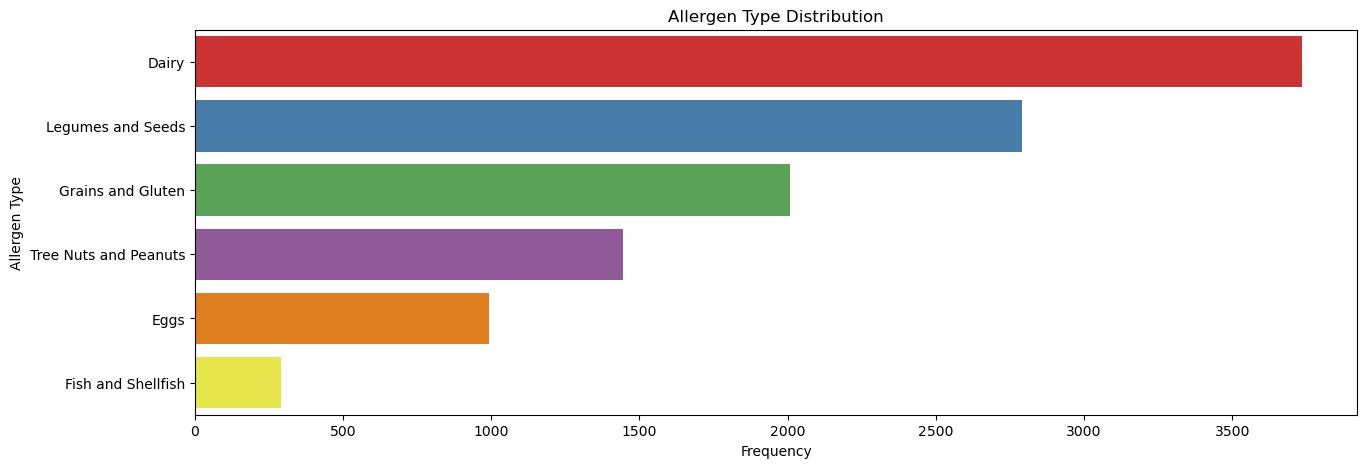

In [48]:
# Separate the allergen types and their counts for plotting
allergen_type, counts = zip(*sorted_allergen_type)

plt.figure(figsize=(15, 5)) 
sns.barplot(x=counts, y=allergen_type, palette='Set1')  
plt.title('Allergen Type Distribution')  
plt.xlabel('Frequency') 
plt.ylabel('Allergen Type')  
plt.show()  

In [52]:
recom_df["processed_name"][0]

''

In [ ]:
#recom_df.to_pickle('data/recommendation_recipes.pkl')